In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import matplotlib as mlp
from matplotlib import rcParams

In [15]:
# 플랏 기본 세팅

# 센치미터를 인치로 변환하는 함수
def cm2in(value):
    return value/2.54
# 폰트 크기 변수 
FS = 8
LEG_FS = FS-1

# 글씨 두께 변수 0.25 간격
LW = np.arange(0, 3.0, 0.25)

# 라인 스타일
DOTTED1 = (1, 1.25)
DASHDOTTED1 = (2.5, 1.25, 1.25, 1.25)
SUBPLOT_NO = list(map(chr, range(97, 123)))

In [16]:
# 기본인 폰트, 플랏 선 설정

PLT_RC_PARAMS = {
    "font": {
        "size": 8,
        # "family": "sans-serif",
        "family": "Calibri",
    },
    "pdf": {
        "fonttype": 42,
    },
    "lines": {
        "dotted_pattern": [1.0, 1.25],
        "dashed_pattern": [0.7, 9],     # only for grid line
        # "dashed_pattern": [3, 1.5],     # for data line 
        "dashdot_pattern": [1, 1.25, 4, 1.25],
    },
    "legend": {
        "columnspacing": 0.75,
        "labelspacing": 0.4,
        "numpoints": 1,         # legend number of markers
        "borderaxespad": 0.4,   # axes 틀로부터 legend 경계까지 거리 
        "handletextpad": 0.3,   # 선과 선이름 사이의 간격 
        "fancybox": False,
        
    },
    "axes": {
        "linewidth": 0.5 
    },
    "xtick": {
        "major": {
            "width": 0.5,
            "size": 2.0,
        },
        "minor": {
            "width": 0.25,
            "size": 1.0,
        },
        "direction": "in",
    },
    "ytick": {
        "major": {
            "width": 0.5,
            "size": 2.0,
        },
        "minor": {
            "width": 0.25,
            "size": 1.0,
        },
        "direction": "in",
    },
    "figure": {
        "dpi": 300
    },
    
    # Other parameters...
}


In [17]:
train_df = pd.read_csv('../data/train.csv')

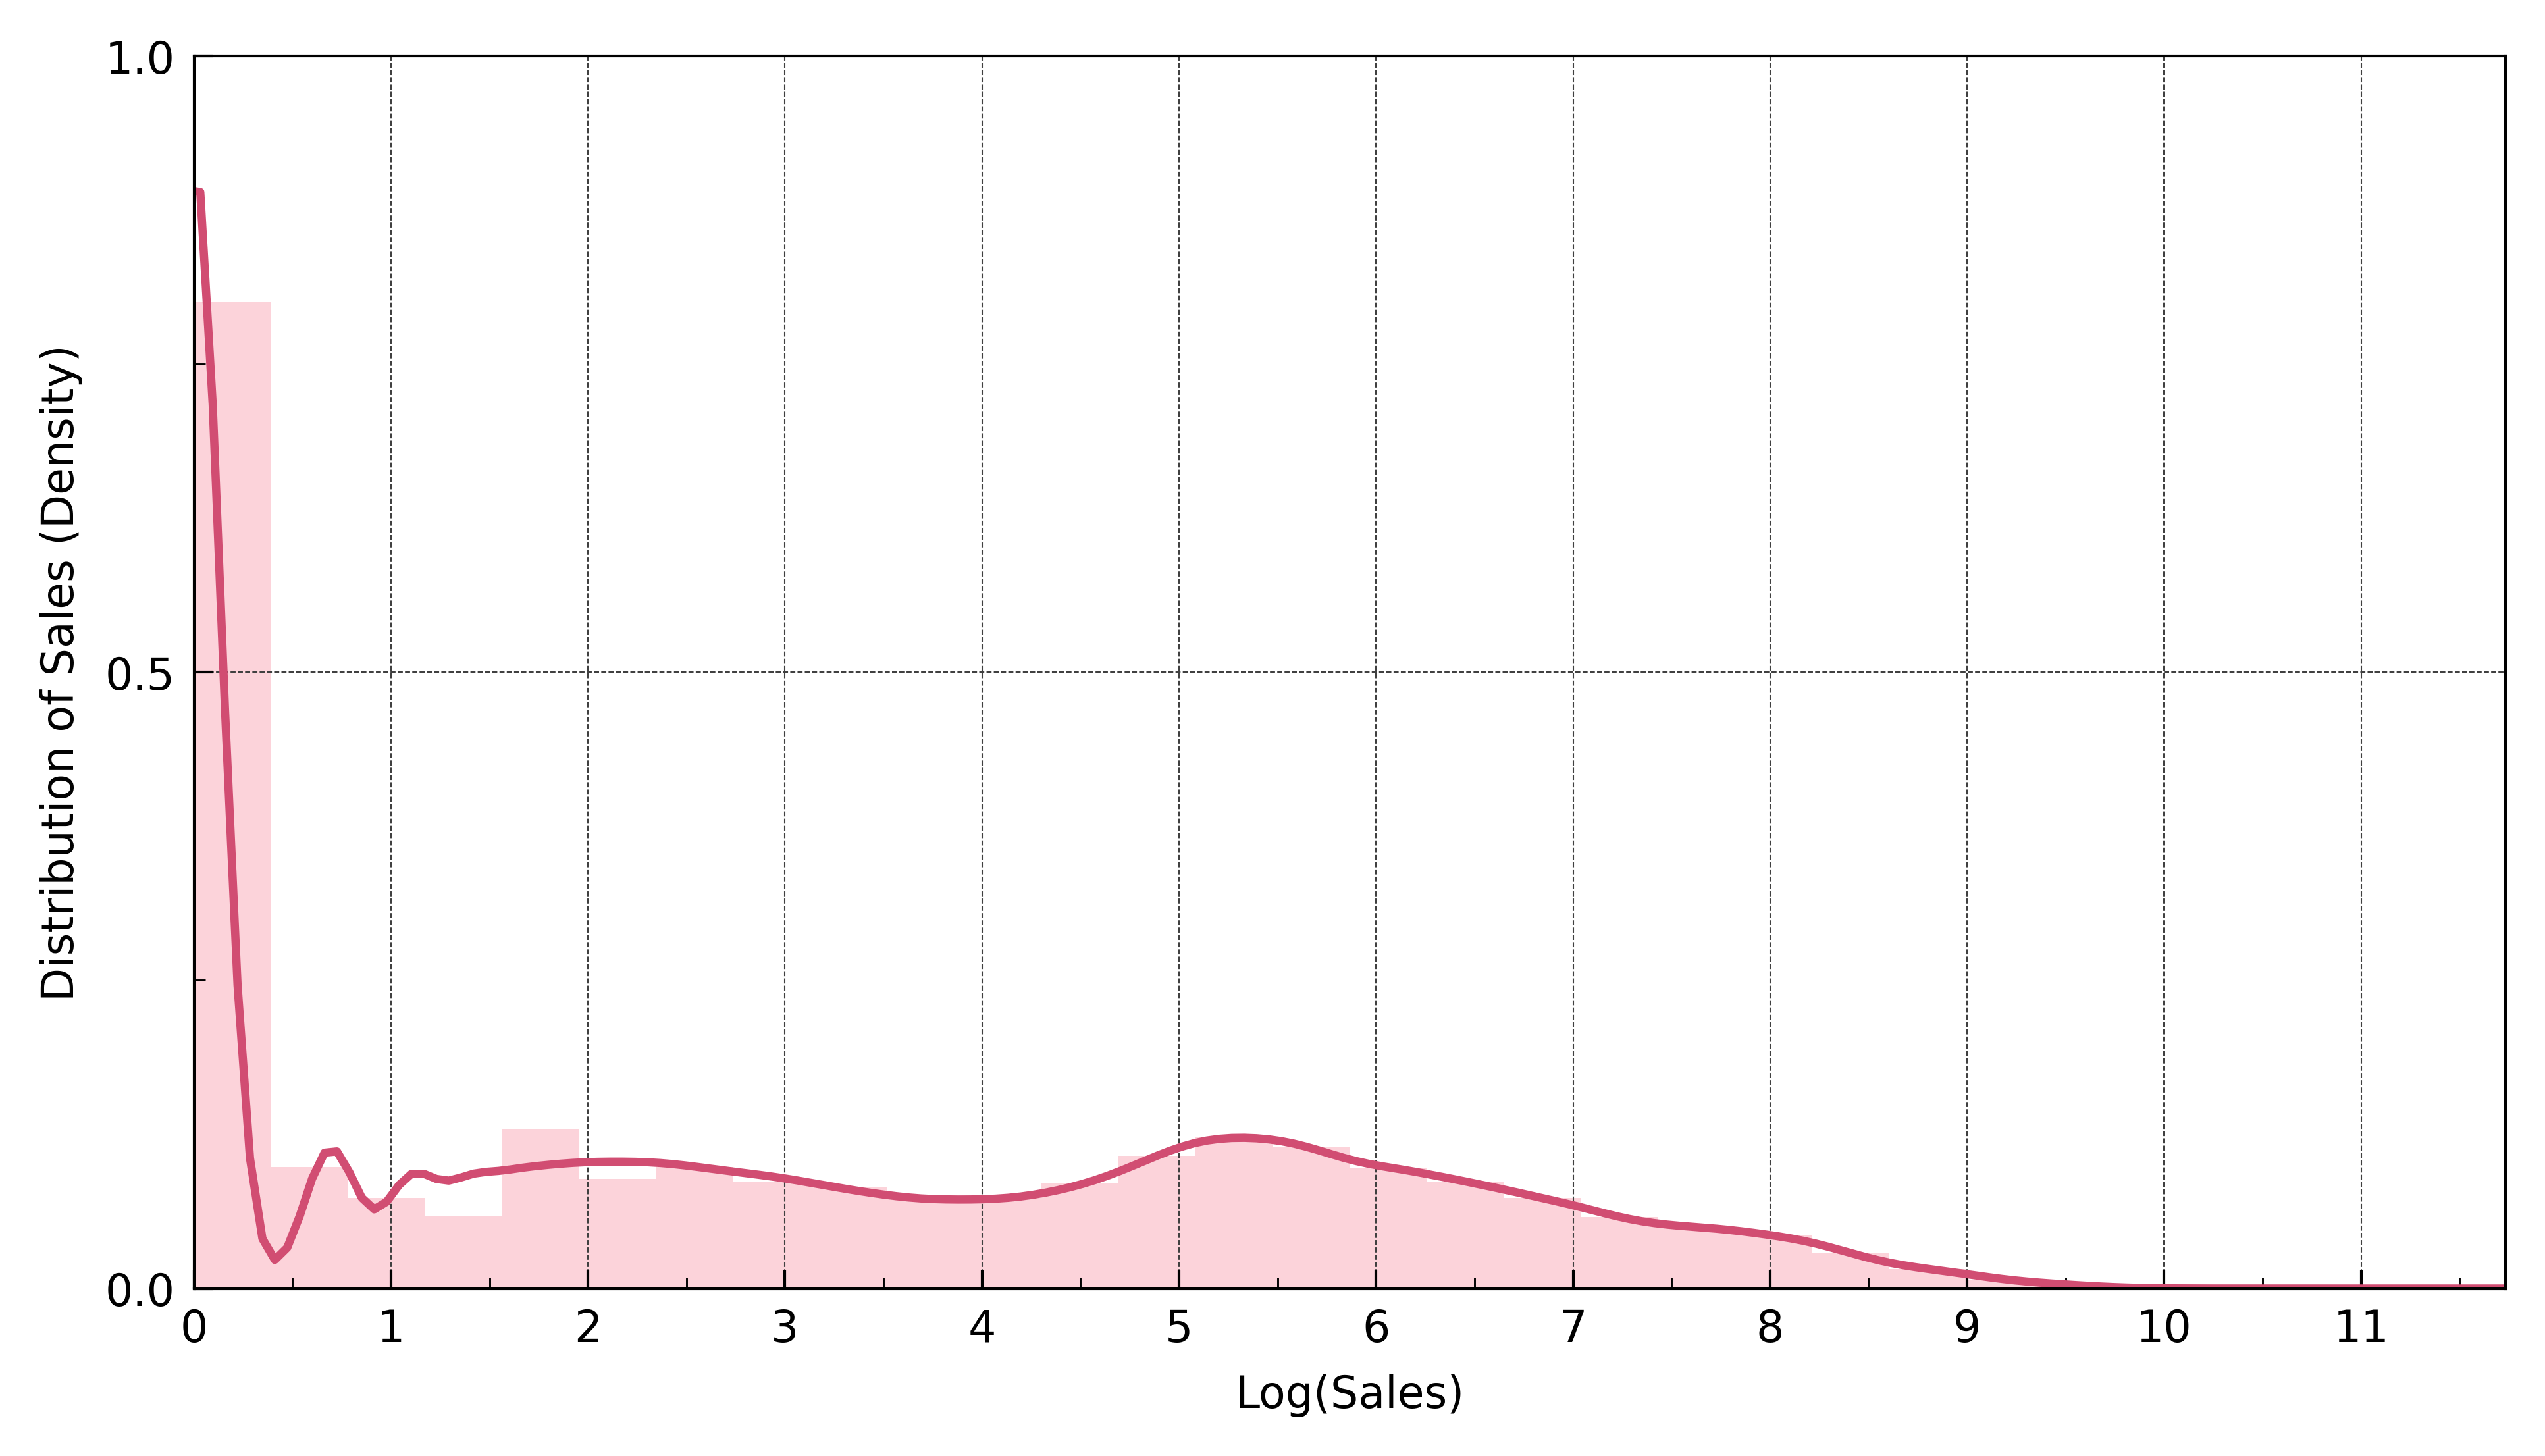

In [53]:
# 데이터의 분포를 확인하기 위해 데이터를 로그처리

data = np.log1p(train_df['sales'])

N =1

# Y_max
Y_max = 1 # 노드 추가하면 맥스 함수 추가해줘야 함

# Y_min
Y_min = 0

# decimal index 소숫점 제거해주기 
d_idx = 10


# Y_int
Y_int = int((Y_max - Y_min)/(N*d_idx))*d_idx

nrows = 1
ncols = 1
nfigs = nrows*ncols

fig, ax = plt.subplots(
    nrows, ncols, 
    sharex=False, sharey=False, 
    figsize=(cm2in(16),cm2in(9)), 
    facecolor='w', edgecolor='k',
    squeeze=False,
    dpi = 600,
    )

plot_y = data
color = ['#FCC8D1','#4FC3F7', '#222222','#180f0d']
plot_label = []

# tick settings 
xmin = [0]*nfigs #tick minimum value, nfig 갯수만큼 [ ] 생성 
xmax = [max(data)]*nfigs #tick max value
xint = [1]*nfigs #tick Y_int
xmar = [0]*nfigs

ymin = [Y_min]*nfigs
ymax = [Y_max]*nfigs
yint = [0.5]*nfigs
ymar = [0]*nfigs

xlabel = ["Log(Sales)"]*nfigs
ylabel = ["Distribution of Sales (Density)"]*nfigs

# 플랏 그리기
for ridx in range(nrows):
    for cidx in range(ncols): 
        for i in range(N):  
        # figure index 
            idx = ncols*ridx + cidx

            ax[ridx, cidx].hist(
            data,
            bins = 30,
            density = True,
            alpha = 0.8,
            color = color[i]
            )

        sns.kdeplot(data, color='#D14D72')
            
        # # 라벨 설정
        ax[ridx,cidx].set_xlabel(f'{xlabel[idx]}', fontsize=FS)
        ax[ridx,cidx].set_ylabel(f'{ylabel[idx]}', fontsize=FS)
        
        # 축 눈금 및 라벨 크기 설정
        ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='major', width=0.5)
        ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='minor', width=0.35)
        
        # 축 위치 설정 
        ax[ridx,cidx].set_xticks(np.arange(xmin[idx], xmax[idx]+xint[idx], xint[idx])) 
        ax[ridx,cidx].set_yticks(np.arange(ymin[idx], ymax[idx]+yint[idx], yint[idx])) 
        
        # x,y 값 제한 
        ax[ridx,cidx].set_xlim(xmin[idx]-xmar[idx], xmax[idx]+xmar[idx])
        ax[ridx,cidx].set_ylim(ymin[idx]-ymar[idx], ymax[idx]+ymar[idx])
        ax[ridx,cidx].margins(x=0, y=0.1)
        
        # 보조 눈금의 수
        ax[ridx,cidx].xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
        ax[ridx,cidx].yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
        
        # 그리드 설정 
        ax[ridx,cidx].grid(True, axis='both', linestyle='--', linewidth=LW[1], color='0.25');    
        
        # legend 
        handles, labels = ax[ridx,cidx].get_legend_handles_labels()
        legorder1 = range(len(handles))
        ax[ridx,cidx].legend([handles[idx] for idx in legorder1],
                            [labels[idx] for idx in legorder1], 
                            loc='upper right', ncol=1, bbox_to_anchor=(0.96, 0.99), frameon=False, 
                            edgecolor='None', facecolor='None',
                            fontsize=LEG_FS, fancybox=False, 
                            columnspacing= 1.05, labelspacing=0.4)
    
        # 그래프 외곽 라인 설정     
        for k in ['top','bottom','left','right']:
                ax[ridx,cidx].spines[k].set_visible(True)
                ax[ridx,cidx].spines[k].set_linewidth(0.5)
                ax[ridx,cidx].spines[k].set_color('k')  
                
# Margin adjustment.
fig.align_labels()
fig.tight_layout(pad=0.2, h_pad=0.2)
plt.subplots_adjust(hspace=0.35, wspace=0.35)

plt.savefig('../plot/Sales.svg', format='svg')

Text(0.5, 1.0, 'Monthly sales by warehouse number')

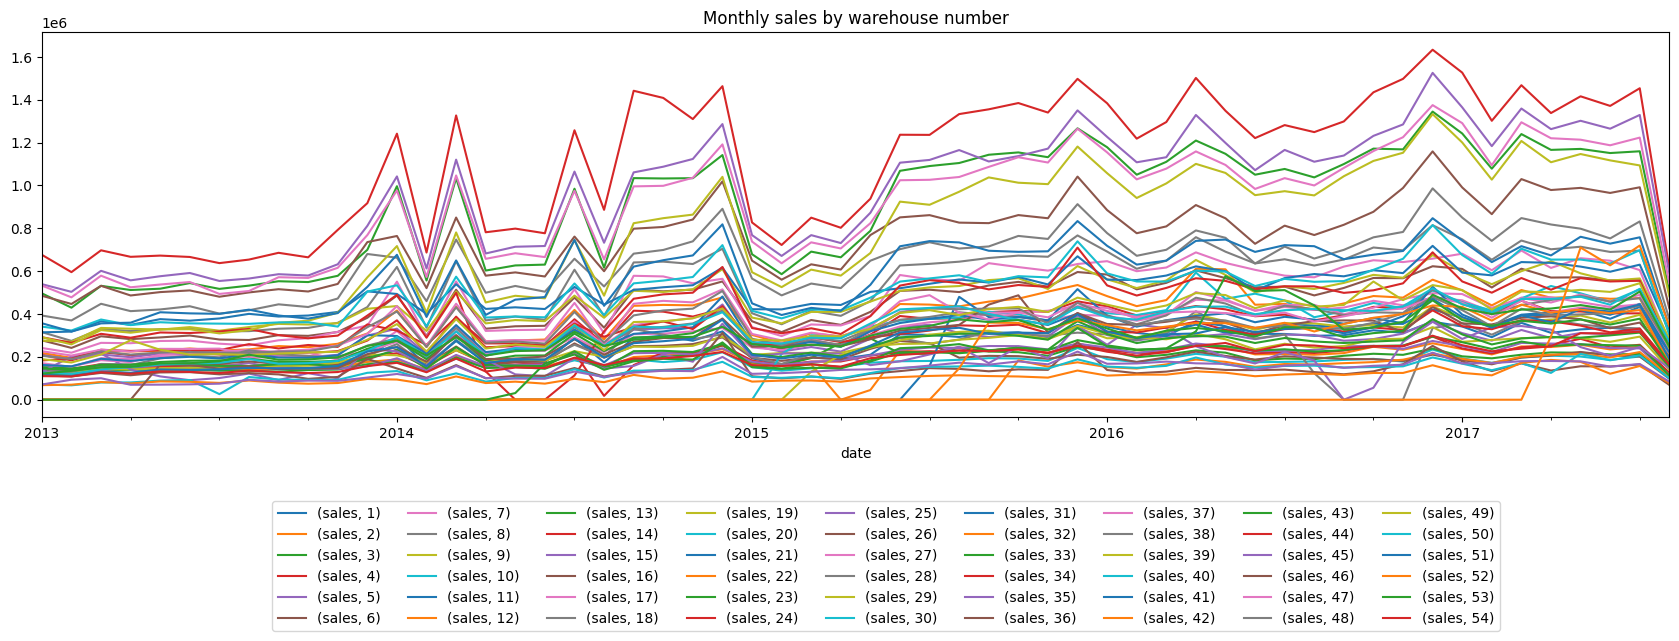

In [10]:
train_df['date'] = pd.to_datetime(train_df['date'])

# 창고 번호별로 총 매출 그룹화
store_nbr_sales_per_month = train_df.groupby(['date', 'store_nbr']).agg({'sales': 'sum'}).unstack().resample('1M').sum()

store_nbr_sales_per_month.plot(figsize=(21,5))
plt.legend(bbox_to_anchor=(0.9, -0.2), ncol=9)
plt.title("Monthly sales by warehouse number")

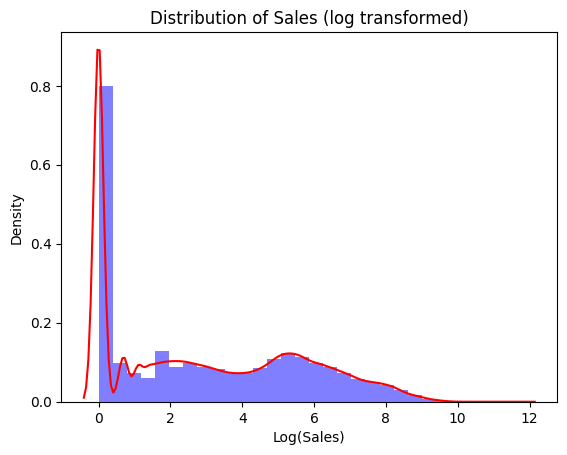

In [20]:
# 데이터 생성
data = np.log1p(train_df['sales'])

# 히스토그램 그리기
plt.hist(data, bins=30, density=True, alpha=0.5, color='blue')

# 커널 밀도 함수 그리기
sns.kdeplot(data, color='red')

# 그래프 레이블 설정
plt.title('Distribution of Sales (log transformed)')
plt.xlabel('Log(Sales)')
plt.ylabel('Density')

# 그래프 보여주기
plt.show()

Text(0.5, 1.0, 'Monthly sales by product family')

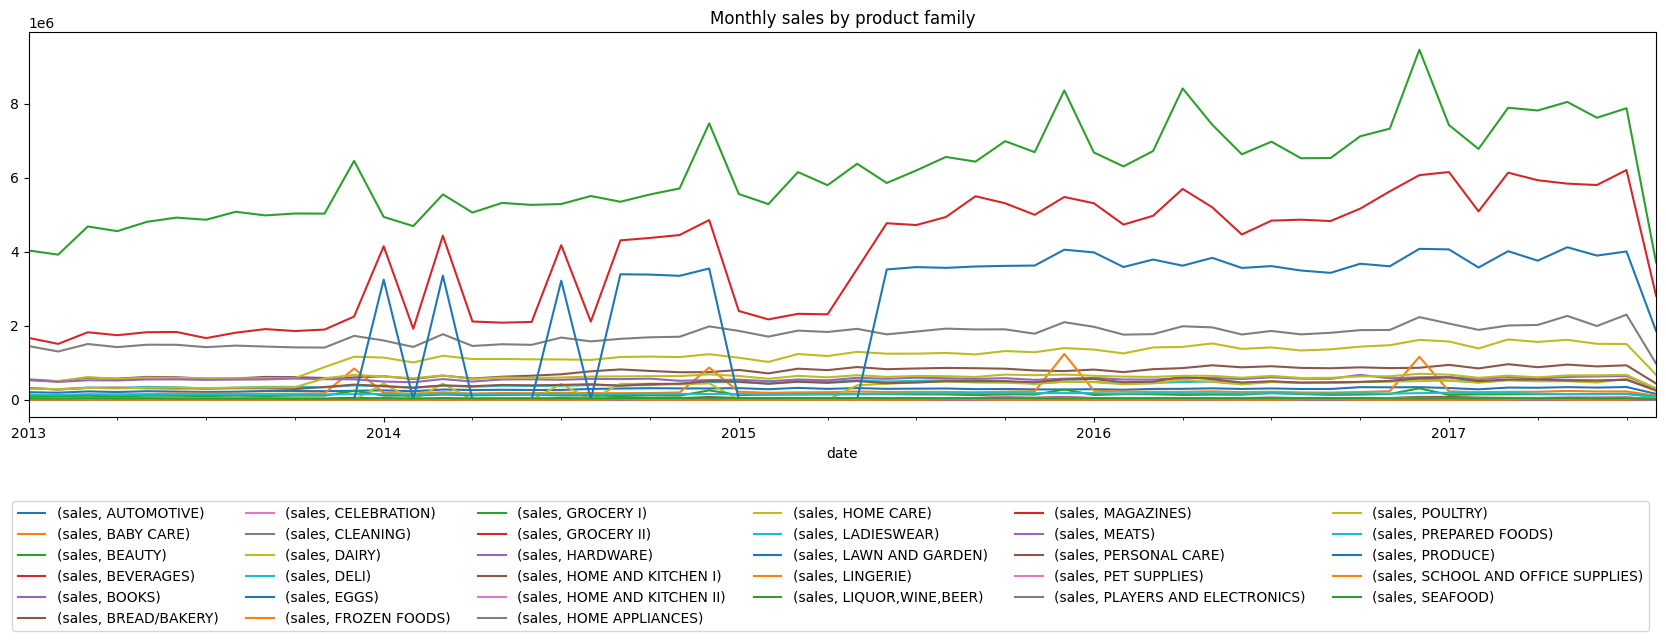

In [12]:
# 제품군별 월별 그룹 총 판매량
family_sales_per_month = train_df.groupby(['date', 'family']).agg({'sales': 'sum'}).unstack().resample('1M').sum()

family_sales_per_month.plot(figsize=(21,5))
plt.legend(bbox_to_anchor=(1, -.2), ncol=6)
plt.title("Monthly sales by product family")